# Questions

### 1. What is the general confidence level of the market?
### 2. Do confidence levels in the upper quartile and lower quartile indicate a coming market reversal?
### 3. How bad does confidence have to be for things to really be bad?
### 4. Is there a dislocation between market sentiment and the realiity of the economy?
### 5. What do macroeconomic measures tell us about the market's performance, and how do they compare to confidence levels?
### 6. Given the current confidence levels of the market what portfolio of three stocks (weighted) are we looking for future performance(long).

In [202]:
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
import alpaca_trade_api as tradeapi

import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
%matplotlib inline
import os 
from dotenv import load_dotenv
import yfinance as yf
import quandl

In [226]:
confidence = pd.read_csv('confidence_levels.csv',infer_datetime_format=True,parse_dates=True,index_col="Date")
confidence_pct = pd.read_csv('confidence_levels_pct.csv' ,infer_datetime_format=True,parse_dates=True,index_col="Date")
unemployment_level = quandl.get("FRED/UNEMPLOY", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly') 
unemployment_pct = unemployment_level.pct_change().dropna()
DJI = yf.Ticker("^DJI")
DJI = DJI.history(period="20y").reset_index()
dji = DJI[['Date', 'Close']].set_index('Date')
dji_volume = DJI[['Date', 'Volume']].set_index('Date')
dji_conf = pd.concat([dji['Close'], confidence], axis=1, join='inner')
dji_pct = dji.pct_change().dropna()
dji_conf_pct = pd.concat([dji_pct, confidence_pct], axis=1, join='inner')
real_gdp = quandl.get("FRED/GDPC1", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly') 
gdp_pct = real_gdp.pct_change().dropna()
sp500 = quandl.get("YALE/SPCOMP", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly')
ten_yr = quandl.get('FRED/DGS10', start_date= '1988-01-01', end_date = '2021-04-01', collapse = 'monthly')
ten_yr_pct = ten_yr.pct_change().dropna()

In [239]:
conf_stats = confidence.describe()
conf_stats.iloc[3, :]
conf_stats

,ins_conf,ind_conf,ins_val,ind_val,ins_crash,ind_crash
count,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000
mean,77.260996,76.539295,66.38444,58.561867,35.869917,32.207593
std,6.169238,8.461401,11.46046,11.744502,8.087025,7.242575
min,54.740000,59.750000,28.79000,27.680000,18.020000,12.990000
25%,74.030000,70.750000,58.93000,48.950000,30.930000,28.050000
50%,77.140000,75.820000,66.67000,61.480000,35.230000,31.750000
75%,80.950000,83.500000,75.45000,67.680000,40.370000,37.310000
max,92.590000,95.620000,88.76000,81.820000,57.950000,48.880000


In [251]:
confidence.hvplot.density()

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [287]:
confidence_plot = confidence.hvplot()
confidence_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

Question 1

1. The general confidence of the stock market is positive, with the mean individual confidence level at 76.5 and mean institutional at 77.62. Over time, the confidence of the stock market for both institutions and individuals has been in a downtrend.
2. Institutional value confidence has reached the same low levels witnessed in 2000, which indicates a stronger confidence in market prices being high. Individual value confidence is reaching these levels. Both are clearly making lower lows.
3. Institutional and individual crash confidences reached levels similar to 2000, 2001, 2009, & 2011, indicating that they believe a crash is more likely. This bounced and rose quickly as in previous instances, but neither the institutional or individual confidence levels have reached the mean levels of confidence, 35 and 32 respectively, yet.


In [100]:
confidence_pct.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

The greatest percent changes occured during times of high market volatility.

Question 2

In [254]:
ins_conf_upper = confidence['ins_conf'].loc[confidence['ins_conf'] > 80.95]
ind_conf_upper = confidence['ind_conf'].loc[confidence['ind_conf'] > 83.5]
ins_conf_lower = confidence['ins_conf'].loc[confidence['ins_conf'] < 74.03]
ind_conf_lower = confidence['ind_conf'].loc[confidence['ind_conf'] < 70.75]
upper = pd.concat([ind_conf_upper, ins_conf_upper], axis = 1, join='inner')
lower = pd.concat([ind_conf_lower, ins_conf_lower], axis = 1, join='inner')
#ins_conf_lower

In [121]:
upper_plot = upper.hvplot(x = 'Date', y = ['ind_conf', 'ins_conf'], kind='scatter' )
lower_plot = lower.hvplot(x = 'Date', y = ['ind_conf', 'ins_conf'], kind='scatter' )
dji_plot = dji.hvplot(x='Date', y='Close')
upper_plot*lower_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Scatter   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [Date]   (value)

In [103]:
dji_plot

:Curve   [Date]   (Close)

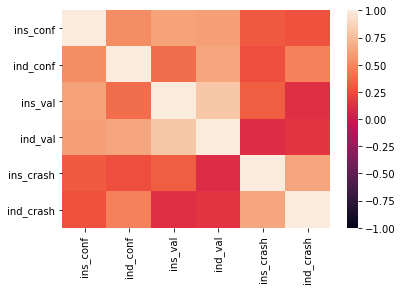

In [104]:
conf_corr = confidence.corr()
sns.heatmap(conf_corr, vmin = -1, vmax = 1)

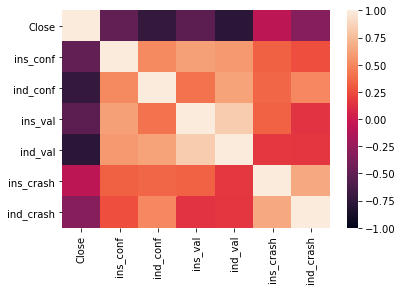

In [105]:
dji_conf_corr = dji_conf.corr()
sns.heatmap(dji_conf_corr, vmin = -1, vmax = 1)

In [220]:
confidence_dji_pct = dji_conf[['Close', "ins_conf", "ind_conf"]].pct_change()
cum_confidence_dji_pct = (1 + confidence_dji_pct).cumprod()
cum_confidence_dji_pct.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [289]:

ins_conf_cov = dji_conf['ins_conf'].cov(dji_conf['Close'])
ind_conf_cov = dji_conf['ind_conf'].cov(dji_conf['Close'])
ins_val_cov = dji_conf['ins_val'].cov(dji_conf['Close'])
ind_val_cov = dji_conf['ind_val'].cov(dji_conf['Close'])
ins_crash_cov = dji_conf['ins_crash'].cov(dji_conf['Close'])
ind_crash_cov = dji_conf['ind_crash'].cov(dji_conf['Close'])

dji_var = dji_conf['Close'].var()

ins_conf_beta = ins_conf_cov / dji_var
ind_conf_beta = ind_conf_cov / dji_var
ins_val_beta = ins_val_cov / dji_var
ind_val_beta = ind_val_cov / dji_var
ins_crash_beta = ins_crash_cov / dji_var
ind_crash_beta = ind_crash_cov / dji_var
print(ins_conf_beta, ind_conf_beta, ins_val_beta, ind_val_beta, ins_crash_beta, ind_crash_beta)

-0.0005394916686370716 -0.001018159761400653 -0.0010974259683213944 -0.0015790096468298487 -0.00011276150034727312 -0.00039501721667879817


In [310]:
unemployment_level.describe()

,Value
count,398.000000
mean,8551.974874
std,2696.164122
min,5481.000000
25%,6725.500000
50%,7698.000000
75%,9194.250000
max,23109.000000


In [317]:
unemployment_upper = unemployment_level.loc[unemployment_level['Value'] > 9194.25]
unemployment_upper.hvplot(x='Date', y='Value' , kind='scatter')

:Scatter   [Date]   (Value)

In [306]:
unemployment_level_plot = (unemployment_level/100).hvplot()

unemployment_level_plot * confidence_plot

:Overlay
   .Curve.I     :Curve   [Date]   (Value)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [293]:
unemployment_pct_plot = unemployment_pct.hvplot()


In [222]:
real_gdp.hvplot()

:Curve   [Date]   (Value)

In [303]:
gdp_pct_plot = gdp_pct.hvplot()

unemployment_rolling = unemployment_pct.rolling(window='50d').mean().hvplot()
unemployment_rolling * gdp_pct_plot

:Overlay
   .Curve.I  :Curve   [Date]   (Value)
   .Curve.II :Curve   [Date]   (Value)

In [304]:
ten_yr.describe()

,Value
count,400.000000
mean,4.598000
std,2.215211
min,0.550000
25%,2.637500
50%,4.490000
75%,6.187500
max,9.320000


In [227]:
ten_yr.hvplot()

:Curve   [Date]   (Value)

In [228]:
ten_yr_pct.hvplot()

:Curve   [Date]   (Value)

Presentation

1. With all the recent retail trading news from the stock market, and the drop in the market last March at the onset of coronavirus